# Exercise 2
#### Sasi Tummala

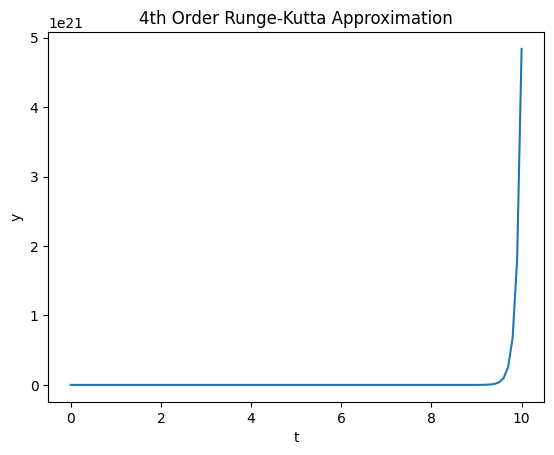

In [2]:
import numpy as np
from scipy.constants import hbar
import matplotlib.pyplot as plt

E1 = 1
E2 = 1
V = 1
c0 = np.array([[1], [0]])

def f(c1, c2):
    return [(E1*c1 + V*c2)/(1j*hbar), (V*c1 + E2*c2)/(1j*hbar)]

def runge_kutta(h, t0, y0, num_steps):
    # Initialize arrays to store the values of t and y
    t_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    
    # Set the initial values
    t_values[0] = t0
    y_values[0] = y0
    
    # Perform the Runge-Kutta approximation
    for i in range(num_steps):
        t = t_values[i]
        y = y_values[i]
        
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        t_values[i+1] = t + h
        y_values[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, y_values

# Set the initial conditions
t0 = 0
y0 = 1

# Set the step size and number of steps
h = 0.1
num_steps = 100

# Perform the Runge-Kutta approximation
t_values, y_values = runge_kutta(h, t0, y0, num_steps)

# Plot the results
plt.plot(t_values, y_values)
plt.xlabel('t')
plt.ylabel('y')
plt.title('4th Order Runge-Kutta Approximation')
plt.show()


/tmp/ipykernel_1534/2586276214.py:14: RuntimeWarning: overflow encountered in multiply
  return complex(0, -1/hbar)*np.dot(H, x)
/tmp/ipykernel_1534/2586276214.py:25: RuntimeWarning: invalid value encountered in multiply
  k3 = f(c[i-1] + h*k2/2)
/tmp/ipykernel_1534/2586276214.py:25: RuntimeWarning: invalid value encountered in divide
  k3 = f(c[i-1] + h*k2/2)
/tmp/ipykernel_1534/2586276214.py:27: RuntimeWarning: invalid value encountered in multiply
  c.append(c[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6)


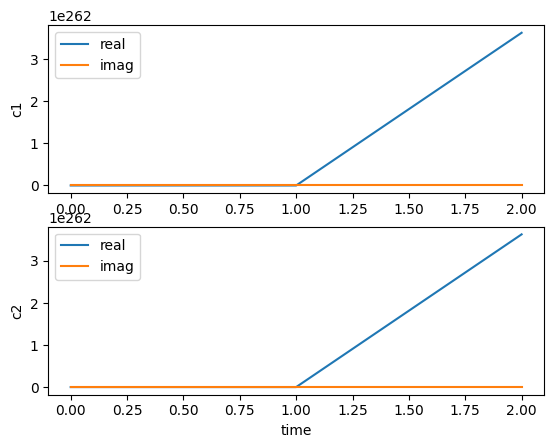

In [4]:
import numpy as np
from scipy.constants import hbar
import matplotlib.pyplot as plt

E1 = 1
E2 = 1
V = 1
c0 = np.array([[1], [0]])
h = 0.1
H = np.array([[E1, V], [V, E2]])
N = 500

def f(x):
    return complex(0, -1/hbar)*np.dot(H, x)

T, c = range(N), []

for i in T:
    
    if i == 0:
        c.append(c0)
    else:
        k1 = f(c[i-1])
        k2 = f(c[i-1] + h*k1/2)
        k3 = f(c[i-1] + h*k2/2)
        k4 = f(c[i-1] + h*k3/2)
        c.append(c[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6)

c1r = [i[0, 0].real for i in c]
c1i = [i[0, 0].imag for i in c]
c2r = [i[1, 0].real for i in c]
c2i = [i[1, 0].imag for i in c]

# Plotting
plt.subplot(2, 1, 1)
plt.plot(T, c1r, label='real')
plt.plot(T, c1i, label='imag')
plt.ylabel('c1')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(T, c2r, label='real')
plt.plot(T, c2i, label='imag')
plt.ylabel('c2')
plt.legend()

plt.xlabel('time')
plt.show()
